# Evaluation of UNET performance upon common distortions

The aim of this notebook is to provide some informations about how a UNET initially trained to segment cells is perturbated by some common distortions applied on the input images. The tested distortions applied on the inputs are an added 2D gaussian, a gaussian noise as well as a rescaling of the input images. To evaluate the performance of the UNET, several plots are generated: the accuracy, the Jaccard index and the number of detected cells in function of the degree of degradation that depends on the parameters of the distortions.

### $\bullet$ Importing libraries and utilitary functions

In [1]:
# import python libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow

# import distortion filters and utilitary functions
from distortions import add_gaussian, zoom_image, zoom_image_to_meet_shape, add_gaussian_noise
from utils import *
from plots import show_image_mask, show_image_pred, plot_all

### $\bullet$ Setting size of the input image and different paths

In [2]:
# Shape of the inputs of the deep network.
images_shape = (256, 256, 1)

# Variables defining the path to the dataset.
test_input_path = '../Dataset/test/input/'
test_output_path = '../Dataset/test/output/'

# Variable defining where model is stored.
model_save_path = "../Model/"

### $\bullet$ Function to display the input images and predictions upon distorsion as well as a summary of values that shows the quality of the predicted images compared to the ground truth

In [3]:
def evaluation_summary(result, image, mask, distorted_image, model):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    
    """
    print("Accuracy                      : {}".format(result["accuracy"]))
    print("Jaccard score                 : {}".format(result["jaccard"]))
    print("Precision                     : {}".format(result["precision"]))
    print("Recall                        : {}".format(result["recall"]))
    print("Number of cells in predictions: {}".format(result["number_cells_predictions"]))
    print("Number of cells in masks      : {}".format(result["number_cells_masks"]))
    show_image_mask(image, mask)
    show_image_pred(distorted_image, model)
    
    
def evaluate_model(images, masks, model, number_cells_masks=None):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    Returns:
        accuracy::[float]
            An array comprised of n_folds equally distributed arrays of y.
        jaccard_score::[float]
            An array comprised of n_folds equally distributed arrays of tX.
        number_cells_predictions::[int]
        number_cells_masks::[int]
    
    """
    predictions = get_binary_predictions(images, model)
    accuracy    = np.mean(predictions == masks)
    jaccard     = compute_jaccard_score(predictions, masks)
    precision, recall = compute_precision_recall(predictions, masks)

    number_cells_predictions = get_number_cells(predictions)
    if number_cells_masks is None:
        number_cells_masks = get_number_cells(masks)
    
    return {"accuracy": accuracy, "jaccard": jaccard, "precision": precision, 
            "recall": recall, "number_cells_predictions": number_cells_predictions,
            "number_cells_masks": number_cells_masks}

### $\bullet$ Retrieve trained model

In [4]:
model = tensorflow.keras.models.load_model(model_save_path)

### $\bullet$ Get input images with the wanted shape from dataset

In [5]:
test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Test set contains {len(test_images)} images of shape {test_images[0].shape}.')

number_cells_masks = get_number_cells(test_masks)
print(f"{number_cells_masks} cells were counted in total over all masks.")

Test set contains 510 images of shape (256, 256, 1).
16228 cells were counted in total over all masks.


### $\bullet$ Analysis of the perturbations caused by an added gaussian on the UNET performance

Accuracy                      : 0.9847514732211244
Jaccard score                 : 0.8087063202052688
Precision                     : 0.849379928008641
Recall                        : 0.9443395932387835
Number of cells in predictions: 18254
Number of cells in masks      : 16228


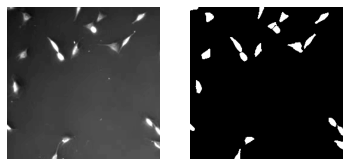

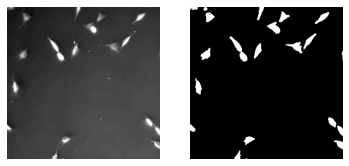

Accuracy                      : 0.9881330901501225
Jaccard score                 : 0.846118637104142
Precision                     : 0.8897222793010694
Recall                        : 0.9454111779417018
Number of cells in predictions: 17431
Number of cells in masks      : 16228


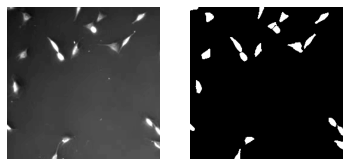

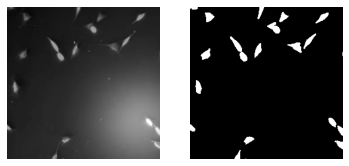

Accuracy                      : 0.9890340468462776
Jaccard score                 : 0.8554073312188356
Precision                     : 0.9136975301517131
Recall                        : 0.9308396408503059
Number of cells in predictions: 17018
Number of cells in masks      : 16228


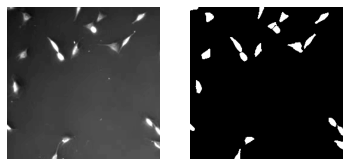

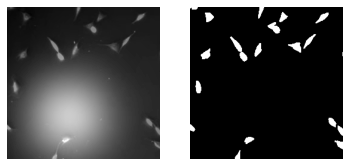

Accuracy                      : 0.9881118176030178
Jaccard score                 : 0.8416906603107506
Precision                     : 0.9214914896631082
Recall                        : 0.9069421892373514
Number of cells in predictions: 16789
Number of cells in masks      : 16228


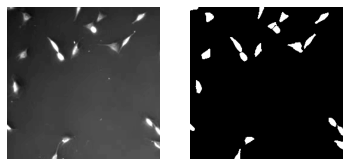

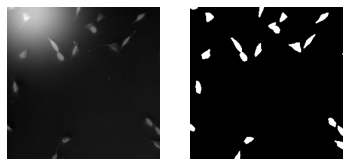

Accuracy                      : 0.9865310070561427
Jaccard score                 : 0.8196967050714723
Precision                     : 0.9244715349151359
Recall                        : 0.8788173634703367
Number of cells in predictions: 16622
Number of cells in masks      : 16228


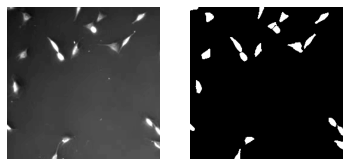

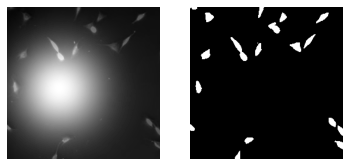

Accuracy                      : 0.9845312978707108
Jaccard score                 : 0.7921294679552102
Precision                     : 0.925491492777213
Recall                        : 0.8465412104180783
Number of cells in predictions: 16424
Number of cells in masks      : 16228


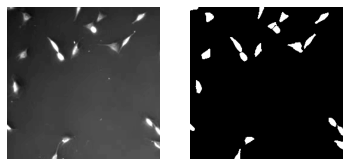

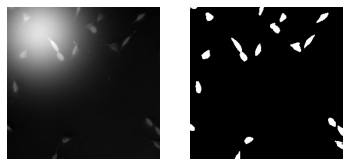

Accuracy                      : 0.9824153825348498
Jaccard score                 : 0.762374257735781
Precision                     : 0.9243704364033126
Recall                        : 0.8137292004296751
Number of cells in predictions: 16207
Number of cells in masks      : 16228


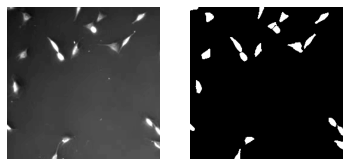

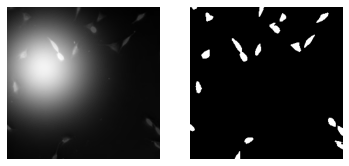

Accuracy                      : 0.9798587873870251
Jaccard score                 : 0.7281416972263404
Precision                     : 0.9243982533963956
Recall                        : 0.7751929534868301
Number of cells in predictions: 15910
Number of cells in masks      : 16228


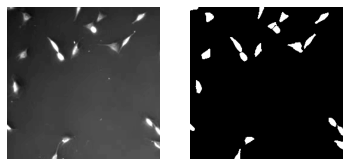

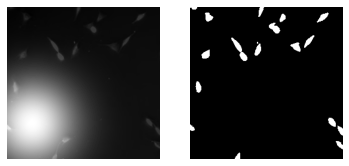

Accuracy                      : 0.9772032793830423
Jaccard score                 : 0.690725000676136
Precision                     : 0.9241040423724467
Recall                        : 0.7335329871004563
Number of cells in predictions: 15465
Number of cells in masks      : 16228


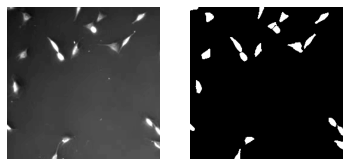

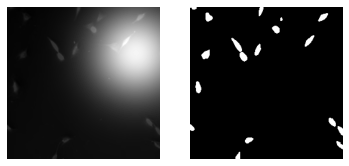

Accuracy                      : 0.9745511223288144
Jaccard score                 : 0.6530838026730421
Precision                     : 0.9243448711943921
Recall                        : 0.691441886025283
Number of cells in predictions: 15115
Number of cells in masks      : 16228


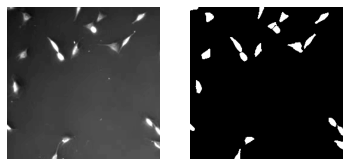

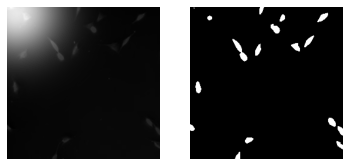

Accuracy                      : 0.971355453192019
Jaccard score                 : 0.6075310118842924
Precision                     : 0.923482926648671
Recall                        : 0.6410977796429795
Number of cells in predictions: 14454
Number of cells in masks      : 16228


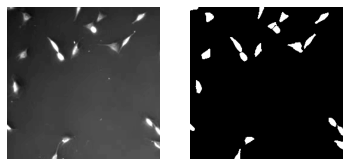

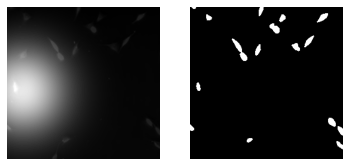

Accuracy                      : 0.9684688792509191
Jaccard score                 : 0.5642483507205439
Precision                     : 0.9244254972360616
Recall                        : 0.5928409755126461
Number of cells in predictions: 13834
Number of cells in masks      : 16228


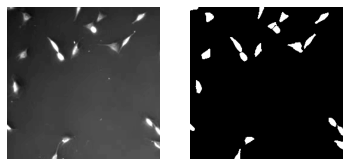

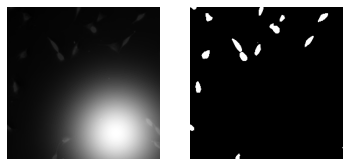

Accuracy                      : 0.965290054620481
Jaccard score                 : 0.5194552002348453
Precision                     : 0.9235798280173996
Recall                        : 0.5442684320474153
Number of cells in predictions: 13049
Number of cells in masks      : 16228


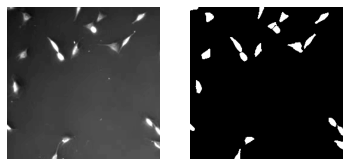

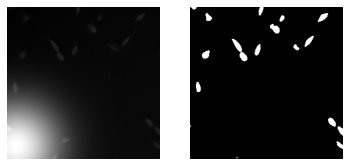

Accuracy                      : 0.9624183804381128
Jaccard score                 : 0.47815942525411825
Precision                     : 0.9228259267334048
Recall                        : 0.4991389795785064
Number of cells in predictions: 12311
Number of cells in masks      : 16228


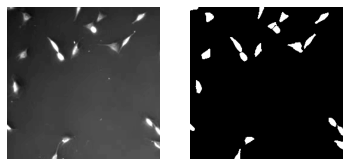

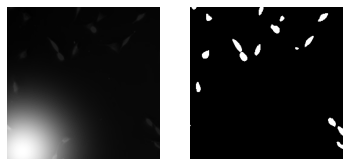

Accuracy                      : 0.960079896216299
Jaccard score                 : 0.4400701067070825
Precision                     : 0.9248887502552993
Recall                        : 0.45802186779032333
Number of cells in predictions: 11672
Number of cells in masks      : 16228


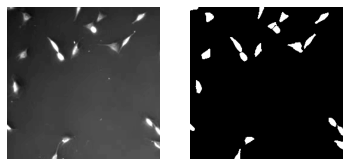

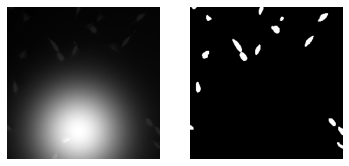

Accuracy                      : 0.9575779933555454
Jaccard score                 : 0.4019726867849506
Precision                     : 0.9232476919983702
Recall                        : 0.4170680861716199
Number of cells in predictions: 10940
Number of cells in masks      : 16228


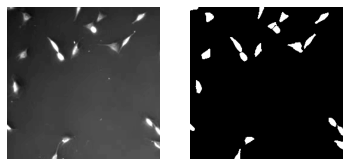

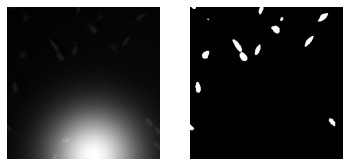

Accuracy                      : 0.9550687303730085
Jaccard score                 : 0.3669696308753217
Precision                     : 0.9231615587681096
Recall                        : 0.3798613719742551
Number of cells in predictions: 10136
Number of cells in masks      : 16228


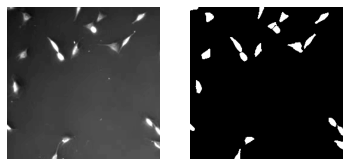

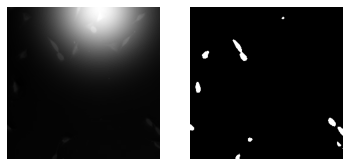

Accuracy                      : 0.9527734494676777
Jaccard score                 : 0.3323468105215599
Precision                     : 0.926120543011078
Recall                        : 0.3425981459928426
Number of cells in predictions: 9400
Number of cells in masks      : 16228


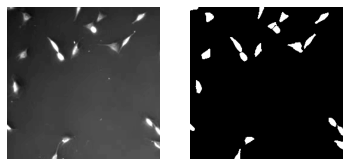

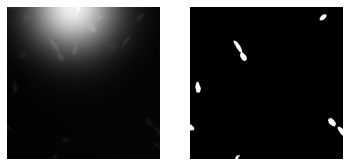

Accuracy                      : 0.9512726727653952
Jaccard score                 : 0.31043993477877646
Precision                     : 0.9219127999874125
Recall                        : 0.31958071042518865
Number of cells in predictions: 8975
Number of cells in masks      : 16228


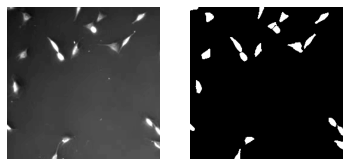

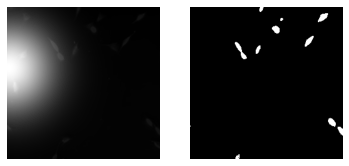

Accuracy                      : 0.9490281946518841
Jaccard score                 : 0.2732855071825083
Precision                     : 0.9259735274146387
Recall                        : 0.28011966004479893
Number of cells in predictions: 8263
Number of cells in masks      : 16228


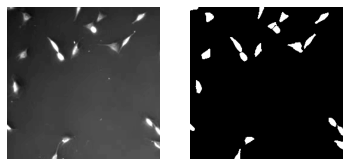

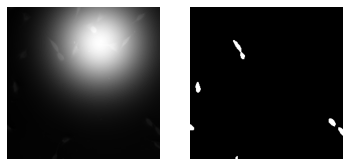

Accuracy                      : 0.9475159588982077
Jaccard score                 : 0.25206747378877864
Precision                     : 0.9239248056858455
Recall                        : 0.25816309632595
Number of cells in predictions: 7717
Number of cells in masks      : 16228


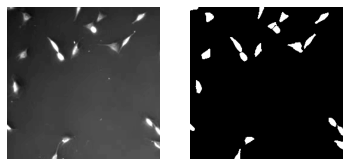

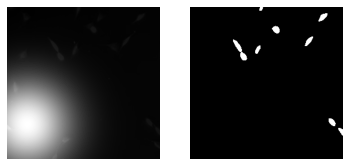

Accuracy                      : 0.9458735746495864
Jaccard score                 : 0.22382655152238493
Precision                     : 0.9245427509578333
Recall                        : 0.22878561190763494
Number of cells in predictions: 7180
Number of cells in masks      : 16228


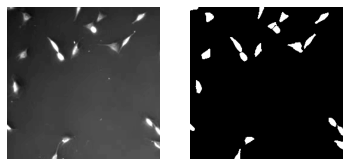

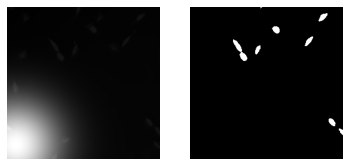

Accuracy                      : 0.9444027769799326
Jaccard score                 : 0.20170295806478747
Precision                     : 0.9256357398981522
Recall                        : 0.20544760849922097
Number of cells in predictions: 6597
Number of cells in masks      : 16228


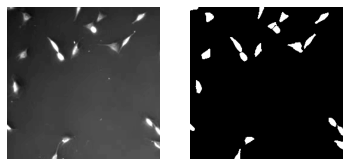

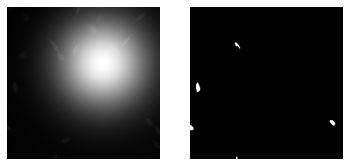

Accuracy                      : 0.9430350210152421
Jaccard score                 : 0.1789696459279352
Precision                     : 0.9276873586721507
Recall                        : 0.1821569878181227
Number of cells in predictions: 6173
Number of cells in masks      : 16228


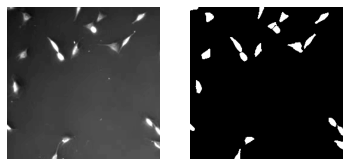

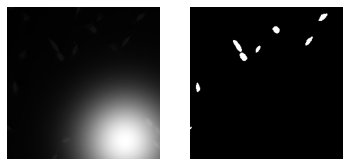

Accuracy                      : 0.9417817358877144
Jaccard score                 : 0.1586327021933414
Precision                     : 0.9342581976703406
Recall                        : 0.16061090541308534
Number of cells in predictions: 5659
Number of cells in masks      : 16228


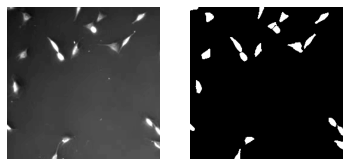

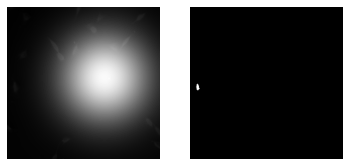

Accuracy                      : 0.9403070487228095
Jaccard score                 : 0.135011012443036
Precision                     : 0.931893632480747
Recall                        : 0.13671859174081297
Number of cells in predictions: 5131
Number of cells in masks      : 16228


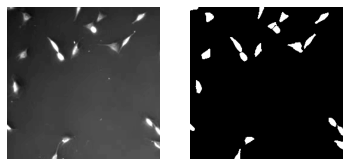

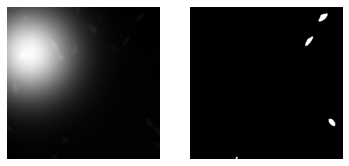

Accuracy                      : 0.9397572536094516
Jaccard score                 : 0.12366122798565654
Precision                     : 0.931844022679555
Recall                        : 0.12484618377939151
Number of cells in predictions: 5006
Number of cells in masks      : 16228


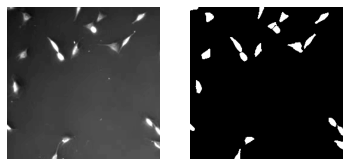

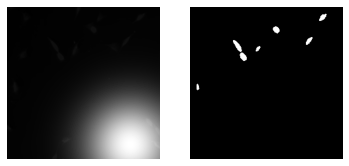

Accuracy                      : 0.9383061128504137
Jaccard score                 : 0.10183919915185753
Precision                     : 0.922970489626223
Recall                        : 0.10275771486988697
Number of cells in predictions: 4364
Number of cells in masks      : 16228


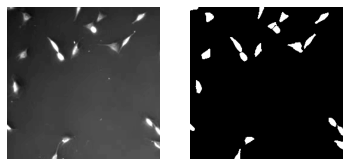

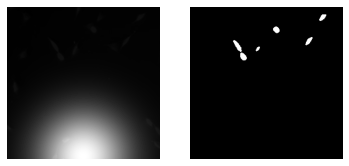

Accuracy                      : 0.9368913239123775
Jaccard score                 : 0.07890000297682392
Precision                     : 0.9199431636067228
Recall                        : 0.07943990588058077
Number of cells in predictions: 3692
Number of cells in masks      : 16228


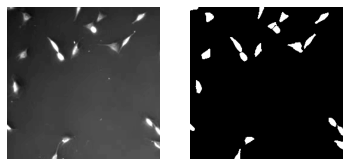

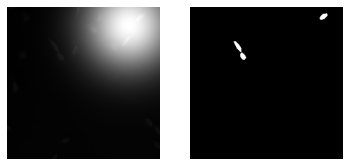

Accuracy                      : 0.9362027037377451
Jaccard score                 : 0.06670439261365857
Precision                     : 0.9040559223988892
Recall                        : 0.06711169973649138
Number of cells in predictions: 3420
Number of cells in masks      : 16228


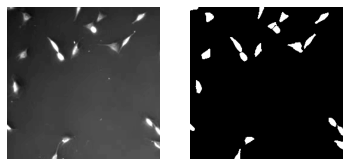

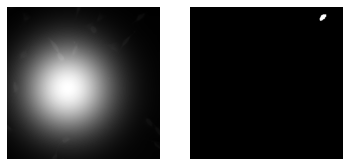

Accuracy                      : 0.9353128769818474
Jaccard score                 : 0.05424170487447426
Precision                     : 0.8656004074785312
Recall                        : 0.05458105295459877
Number of cells in predictions: 2903
Number of cells in masks      : 16228


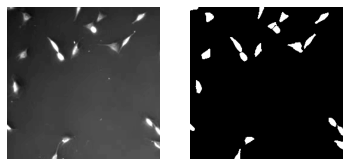

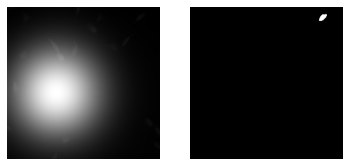

Accuracy                      : 0.9346846337411918
Jaccard score                 : 0.04230926656820025
Precision                     : 0.8502604596425811
Recall                        : 0.04248880146337841
Number of cells in predictions: 2542
Number of cells in masks      : 16228


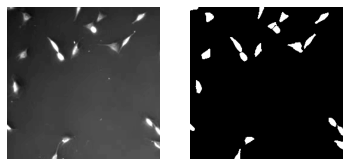

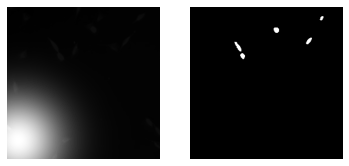

Accuracy                      : 0.9340557023590687
Jaccard score                 : 0.032896466355039684
Precision                     : 0.798769872425472
Recall                        : 0.03303863752279974
Number of cells in predictions: 2190
Number of cells in masks      : 16228


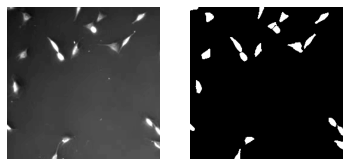

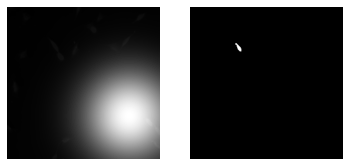

Accuracy                      : 0.9335853427064185
Jaccard score                 : 0.025498282930786213
Precision                     : 0.763441165040384
Recall                        : 0.025624852161903064
Number of cells in predictions: 1864
Number of cells in masks      : 16228


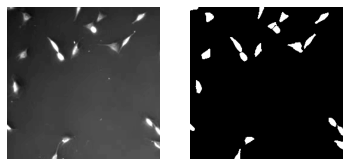

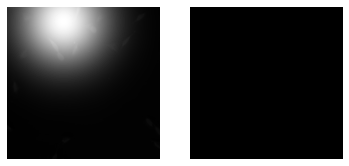

Accuracy                      : 0.9331671022901348
Jaccard score                 : 0.019472761817207997
Precision                     : 0.7109074877056456
Recall                        : 0.019540254900835677
Number of cells in predictions: 1627
Number of cells in masks      : 16228


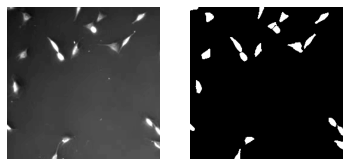

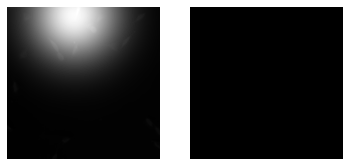

Accuracy                      : 0.9329793892654719
Jaccard score                 : 0.01594377753940976
Precision                     : 0.6249828419572682
Recall                        : 0.016000834080902412
Number of cells in predictions: 1455
Number of cells in masks      : 16228


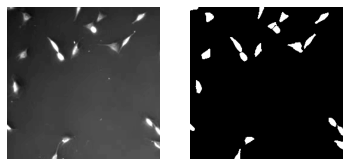

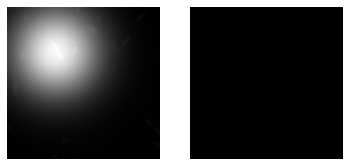

Accuracy                      : 0.9327477847828585
Jaccard score                 : 0.01202651567679137
Precision                     : 0.5842521654440068
Recall                        : 0.012063901998969059
Number of cells in predictions: 1270
Number of cells in masks      : 16228


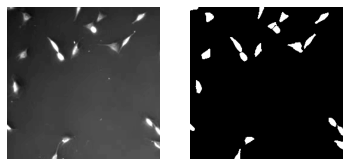

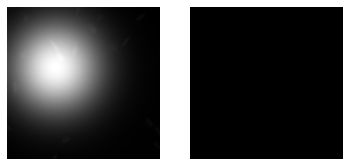

Accuracy                      : 0.932576706830193
Jaccard score                 : 0.009108694974167384
Precision                     : 0.5119923380230003
Recall                        : 0.009135225129622436
Number of cells in predictions: 1123
Number of cells in masks      : 16228


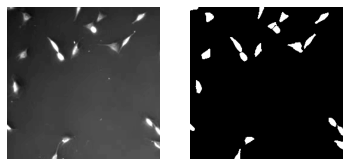

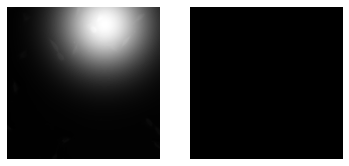

Accuracy                      : 0.9323518940046722
Jaccard score                 : 0.007006311500197493
Precision                     : 0.42902032665175327
Recall                        : 0.007048334619317517
Number of cells in predictions: 1030
Number of cells in masks      : 16228


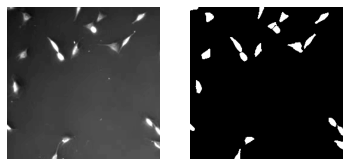

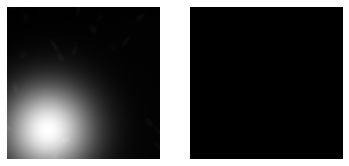

Accuracy                      : 0.9322535795323988
Jaccard score                 : 0.004915526878964736
Precision                     : 0.35039553050551736
Recall                        : 0.004928589499496966
Number of cells in predictions: 887
Number of cells in masks      : 16228


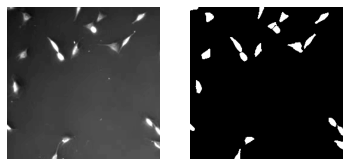

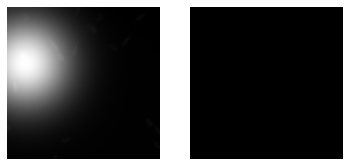

Accuracy                      : 0.932175370758655
Jaccard score                 : 0.004345461086285
Precision                     : 0.3076438870976546
Recall                        : 0.004370712053714825
Number of cells in predictions: 827
Number of cells in masks      : 16228


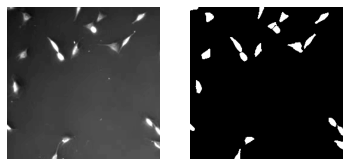

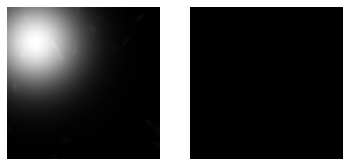

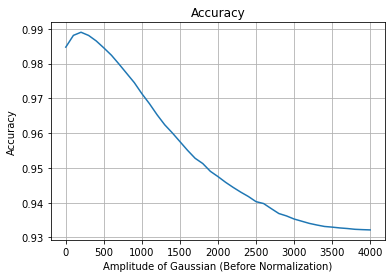

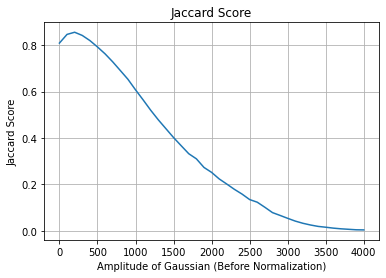

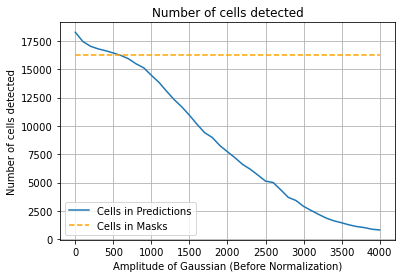

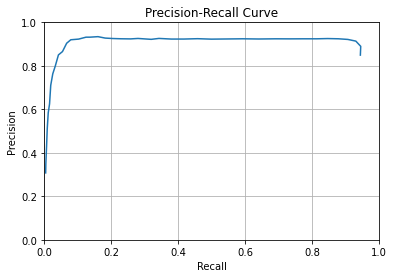

In [6]:
amplitudes = np.linspace(0, 4000, 41)
results = {}

for amplitude in amplitudes:
    added_gaussian_test_images = []
    
    for image in test_images:
        added_gaussian_test_images.append(add_gaussian(image, amplitude))
    
    result = evaluate_model(np.array(added_gaussian_test_images), test_masks, model, number_cells_masks)
    results[amplitude] = result
    
    evaluation_summary(result, test_images[0], test_masks[0], added_gaussian_test_images[0], model)
    
plot_all(results, "Amplitude of Gaussian (Before Normalization)")

### $\bullet$ Analysis of the perturbations caused by a gaussian noise on the UNET performance

Accuracy                      : 0.9847514732211244
Jaccard score                 : 0.8087063202052688
Precision                     : 0.849379928008641
Recall                        : 0.9443395932387835
Number of cells in predictions: 18254
Number of cells in masks      : 16228


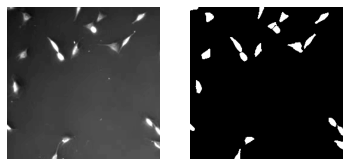

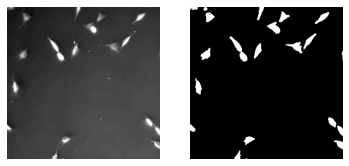

Accuracy                      : 0.9849756577435662
Jaccard score                 : 0.8064521179839362
Precision                     : 0.867319961665204
Recall                        : 0.9204861944168967
Number of cells in predictions: 19488
Number of cells in masks      : 16228


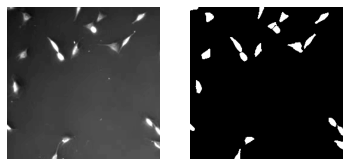

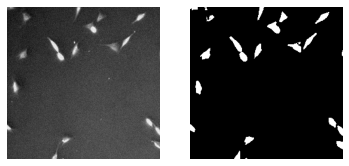

Accuracy                      : 0.9810340731751686
Jaccard score                 : 0.7571912153625909
Precision                     : 0.8455075261737723
Recall                        : 0.8796038335116221
Number of cells in predictions: 29295
Number of cells in masks      : 16228


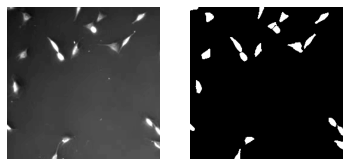

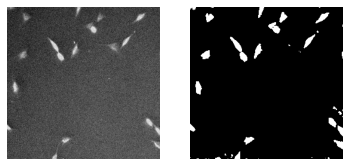

Accuracy                      : 0.973858133951823
Jaccard score                 : 0.6788775705692227
Precision                     : 0.7862728899598929
Recall                        : 0.8337129946758454
Number of cells in predictions: 42853
Number of cells in masks      : 16228


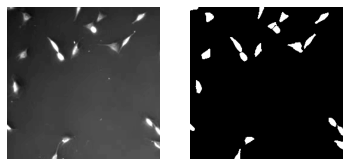

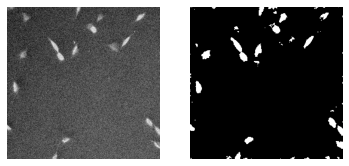

Accuracy                      : 0.9655717737534467
Jaccard score                 : 0.5995975612041995
Precision                     : 0.7211795484403838
Recall                        : 0.7832817143096772
Number of cells in predictions: 57266
Number of cells in masks      : 16228


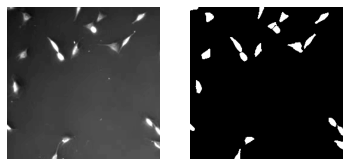

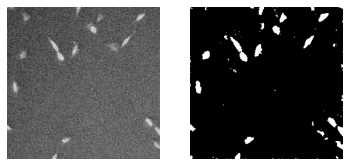

Accuracy                      : 0.9572427787032782
Jaccard score                 : 0.5284798704136969
Precision                     : 0.6585258833174105
Recall                        : 0.7314366576256738
Number of cells in predictions: 72377
Number of cells in masks      : 16228


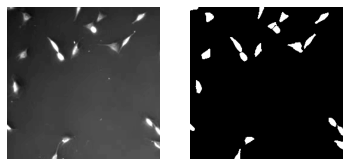

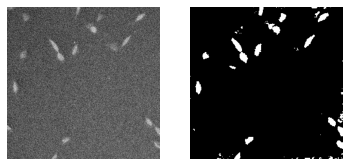

Accuracy                      : 0.948760746974571
Jaccard score                 : 0.4651029577243448
Precision                     : 0.5984315236531212
Recall                        : 0.6811516329360652
Number of cells in predictions: 89499
Number of cells in masks      : 16228


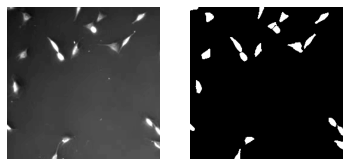

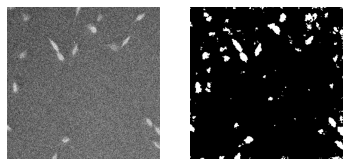

Accuracy                      : 0.9410809086818321
Jaccard score                 : 0.4140304605284355
Precision                     : 0.5482515177676498
Recall                        : 0.637164222826398
Number of cells in predictions: 105898
Number of cells in masks      : 16228


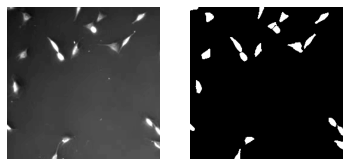

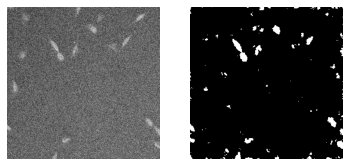

Accuracy                      : 0.9335130579331342
Jaccard score                 : 0.3662423014708252
Precision                     : 0.5011216853140071
Recall                        : 0.5871110287915461
Number of cells in predictions: 119436
Number of cells in masks      : 16228


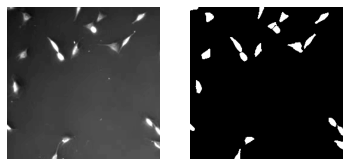

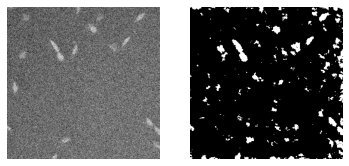

Accuracy                      : 0.9273059321384803
Jaccard score                 : 0.32861716835424115
Precision                     : 0.46448684497347364
Recall                        : 0.5427346359809457
Number of cells in predictions: 132341
Number of cells in masks      : 16228


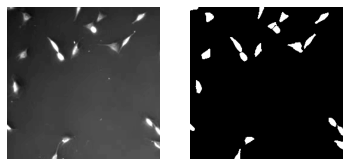

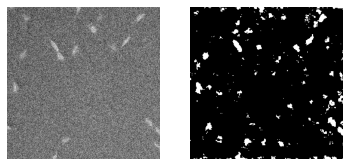

Accuracy                      : 0.9221691355985754
Jaccard score                 : 0.29882847289451375
Precision                     : 0.43380680523020176
Recall                        : 0.5070603271092028
Number of cells in predictions: 141847
Number of cells in masks      : 16228


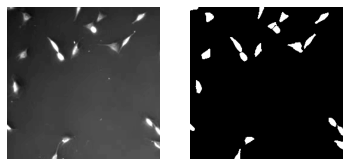

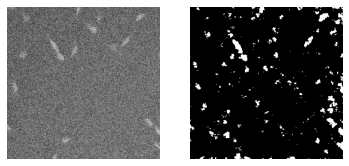

Accuracy                      : 0.9170496622721355
Jaccard score                 : 0.27237302585710604
Precision                     : 0.4037950437782112
Recall                        : 0.47452398330321083
Number of cells in predictions: 151450
Number of cells in masks      : 16228


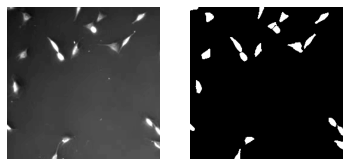

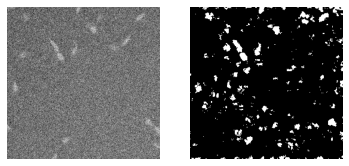

Accuracy                      : 0.9118724748200061
Jaccard score                 : 0.24531073685210786
Precision                     : 0.3721360463633452
Recall                        : 0.43735690057968174
Number of cells in predictions: 161514
Number of cells in masks      : 16228


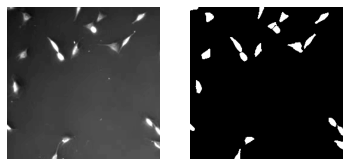

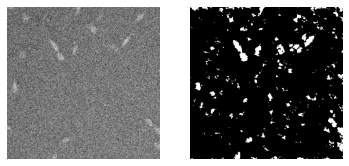

Accuracy                      : 0.9072375129250919
Jaccard score                 : 0.2230709549829111
Precision                     : 0.3442258666897595
Recall                        : 0.40790146950673706
Number of cells in predictions: 171223
Number of cells in masks      : 16228


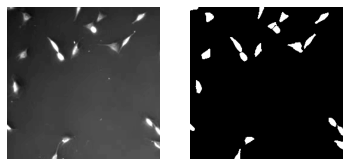

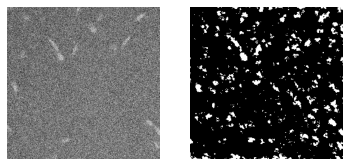

Accuracy                      : 0.9036105885225184
Jaccard score                 : 0.20700128777396884
Precision                     : 0.32314547909089075
Recall                        : 0.38509387143755275
Number of cells in predictions: 177838
Number of cells in masks      : 16228


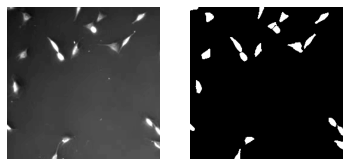

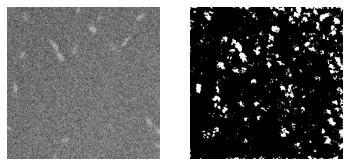

Accuracy                      : 0.901075595032935
Jaccard score                 : 0.1926353593675961
Precision                     : 0.3076426460923081
Recall                        : 0.3621933298369503
Number of cells in predictions: 182936
Number of cells in masks      : 16228


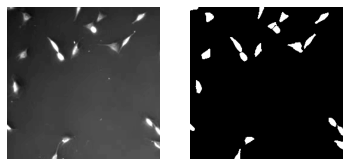

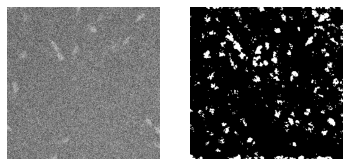

Accuracy                      : 0.8970592124789369
Jaccard score                 : 0.17789137131600077
Precision                     : 0.2841807211275243
Recall                        : 0.3421165588536785
Number of cells in predictions: 190686
Number of cells in masks      : 16228


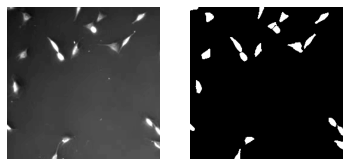

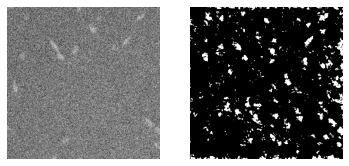

Accuracy                      : 0.8952535292681526
Jaccard score                 : 0.16669141323187592
Precision                     : 0.2710838340170511
Recall                        : 0.32085401966702715
Number of cells in predictions: 193320
Number of cells in masks      : 16228


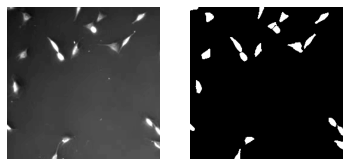

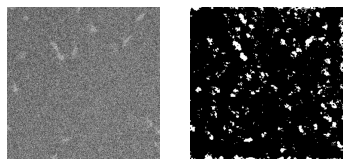

Accuracy                      : 0.8934017106598499
Jaccard score                 : 0.15784494062384472
Precision                     : 0.2582221491170005
Recall                        : 0.30703111257993515
Number of cells in predictions: 196129
Number of cells in masks      : 16228


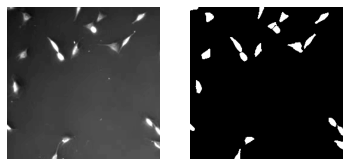

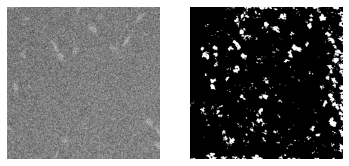

Accuracy                      : 0.8906874712775735
Jaccard score                 : 0.14774222195552444
Precision                     : 0.24506586620595108
Recall                        : 0.2916763654540978
Number of cells in predictions: 201631
Number of cells in masks      : 16228


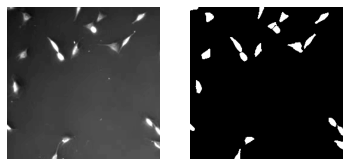

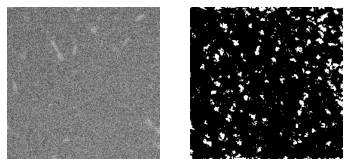

Accuracy                      : 0.888751101026348
Jaccard score                 : 0.1403144956671243
Precision                     : 0.23234718233857454
Recall                        : 0.2787679381486674
Number of cells in predictions: 205588
Number of cells in masks      : 16228


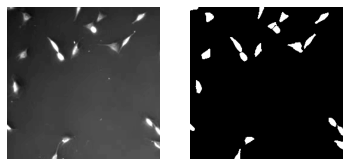

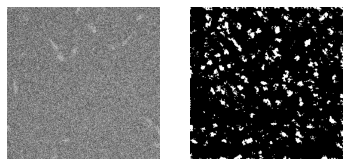

Accuracy                      : 0.8876891790651807
Jaccard score                 : 0.13353054871602835
Precision                     : 0.22339242763427397
Recall                        : 0.26634904073194265
Number of cells in predictions: 207361
Number of cells in masks      : 16228


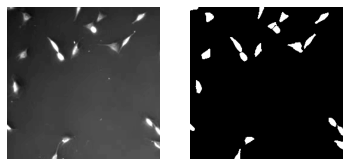

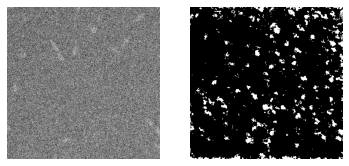

Accuracy                      : 0.8860780902937346
Jaccard score                 : 0.1279523065192345
Precision                     : 0.21469346328662936
Recall                        : 0.2570579232029482
Number of cells in predictions: 210929
Number of cells in masks      : 16228


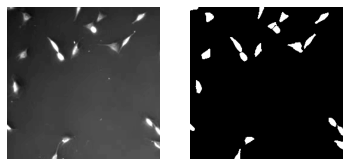

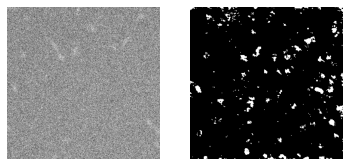

Accuracy                      : 0.8854428160424326
Jaccard score                 : 0.12113647892783323
Precision                     : 0.20673702059598711
Recall                        : 0.24278080545779784
Number of cells in predictions: 208754
Number of cells in masks      : 16228


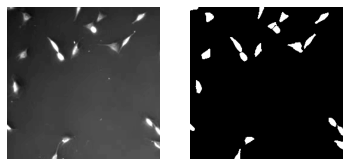

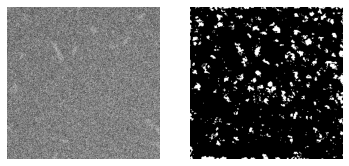

Accuracy                      : 0.8844899794634651
Jaccard score                 : 0.1144958951739913
Precision                     : 0.19803792772441092
Recall                        : 0.23011706031196172
Number of cells in predictions: 209745
Number of cells in masks      : 16228


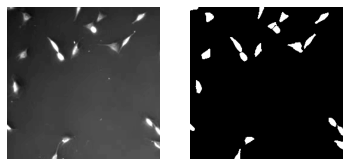

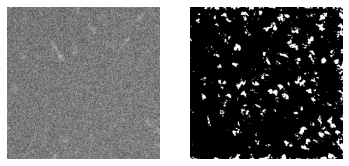

Accuracy                      : 0.8818355485504749
Jaccard score                 : 0.1111143297405732
Precision                     : 0.18855121079429493
Recall                        : 0.2262967973984477
Number of cells in predictions: 215755
Number of cells in masks      : 16228


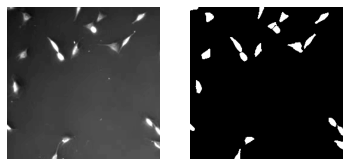

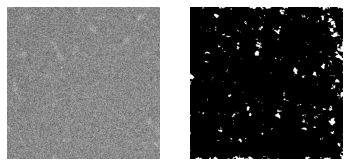

Accuracy                      : 0.8814510569852941
Jaccard score                 : 0.10732695034714661
Precision                     : 0.18373531190739464
Recall                        : 0.21835215822242443
Number of cells in predictions: 215774
Number of cells in masks      : 16228


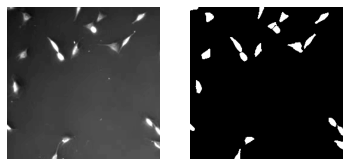

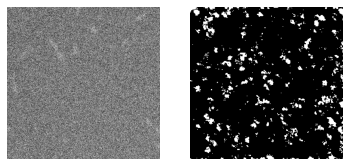

Accuracy                      : 0.8808028576420802
Jaccard score                 : 0.10284886945757248
Precision                     : 0.17792553086082444
Recall                        : 0.210506275615965
Number of cells in predictions: 219093
Number of cells in masks      : 16228


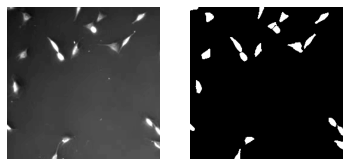

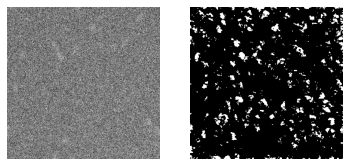

Accuracy                      : 0.8793579999138327
Jaccard score                 : 0.10042413031982363
Precision                     : 0.17312016026986177
Recall                        : 0.20751458731408504
Number of cells in predictions: 221503
Number of cells in masks      : 16228


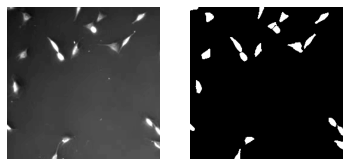

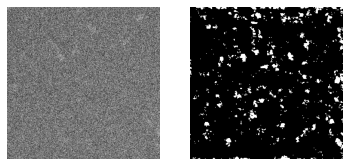

Accuracy                      : 0.8788835413315716
Jaccard score                 : 0.09562251099461688
Precision                     : 0.16596004483237103
Recall                        : 0.19697593097886257
Number of cells in predictions: 219570
Number of cells in masks      : 16228


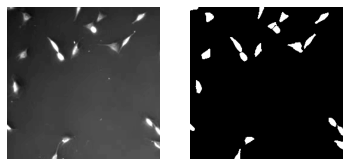

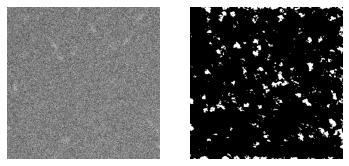

Accuracy                      : 0.8777312035654106
Jaccard score                 : 0.092901187729898
Precision                     : 0.1613087097988212
Recall                        : 0.19255641500069393
Number of cells in predictions: 221909
Number of cells in masks      : 16228


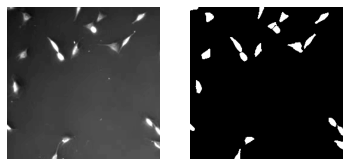

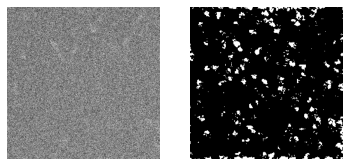

Accuracy                      : 0.877012424842984
Jaccard score                 : 0.09025743991240129
Precision                     : 0.1568694368481082
Recall                        : 0.1880979869482556
Number of cells in predictions: 221936
Number of cells in masks      : 16228


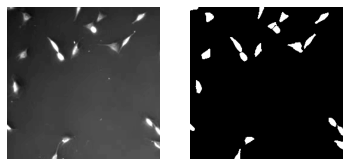

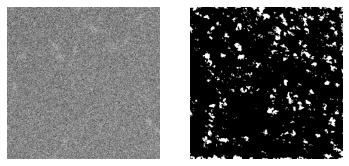

Accuracy                      : 0.8770755543428309
Jaccard score                 : 0.08858523116131968
Precision                     : 0.1554538720626015
Recall                        : 0.18381224574474223
Number of cells in predictions: 221684
Number of cells in masks      : 16228


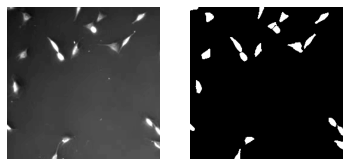

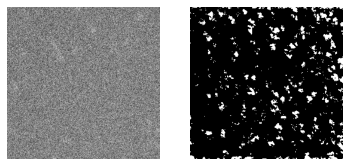

Accuracy                      : 0.8760075887044271
Jaccard score                 : 0.08617941134202124
Precision                     : 0.1505722251030731
Recall                        : 0.1799873933155996
Number of cells in predictions: 224024
Number of cells in masks      : 16228


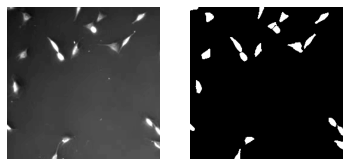

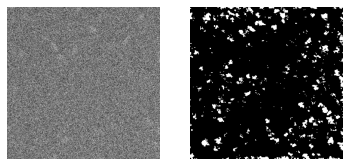

Accuracy                      : 0.8757204242781097
Jaccard score                 : 0.08432472637290331
Precision                     : 0.14800367952724702
Recall                        : 0.17605177781618095
Number of cells in predictions: 225363
Number of cells in masks      : 16228


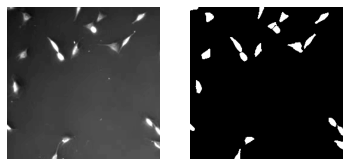

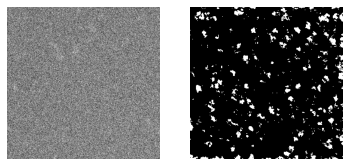

Accuracy                      : 0.8750120574352788
Jaccard score                 : 0.08322246628838707
Precision                     : 0.14591000491556513
Recall                        : 0.1743490083187742
Number of cells in predictions: 226955
Number of cells in masks      : 16228


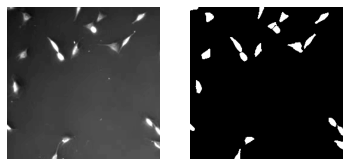

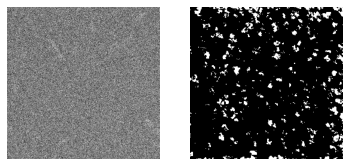

Accuracy                      : 0.8755544924268536
Jaccard score                 : 0.08120523015213346
Precision                     : 0.14347468353766643
Recall                        : 0.1695017939566895
Number of cells in predictions: 224165
Number of cells in masks      : 16228


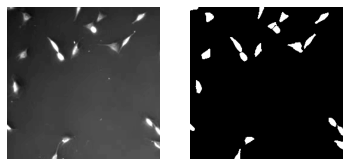

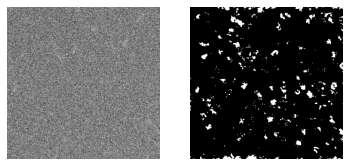

Accuracy                      : 0.8747060439165901
Jaccard score                 : 0.07782428211240794
Precision                     : 0.1376203012356731
Recall                        : 0.16285862740845286
Number of cells in predictions: 224655
Number of cells in masks      : 16228


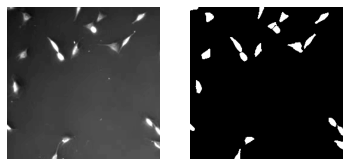

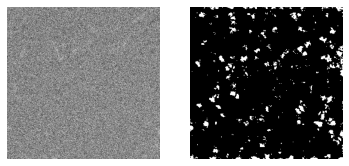

Accuracy                      : 0.8747435027477788
Jaccard score                 : 0.07649237877220845
Precision                     : 0.13648141421863325
Recall                        : 0.1600700361864901
Number of cells in predictions: 224157
Number of cells in masks      : 16228


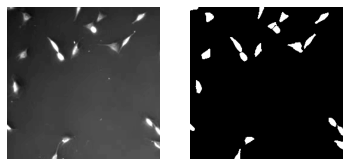

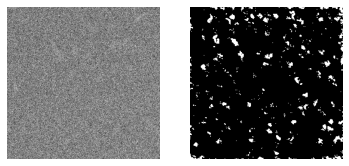

Accuracy                      : 0.8732525096220128
Jaccard score                 : 0.07557665941022133
Precision                     : 0.13323614651999022
Recall                        : 0.15892781221720412
Number of cells in predictions: 227437
Number of cells in masks      : 16228


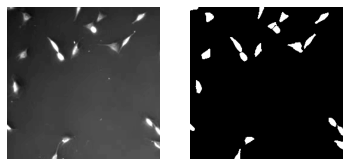

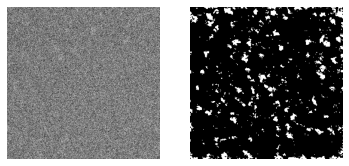

Accuracy                      : 0.8728661929859834
Jaccard score                 : 0.07533316582776102
Precision                     : 0.13282319493870692
Recall                        : 0.15873734364738984
Number of cells in predictions: 227264
Number of cells in masks      : 16228


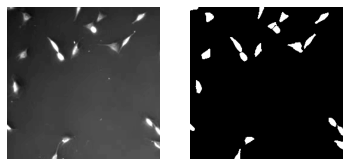

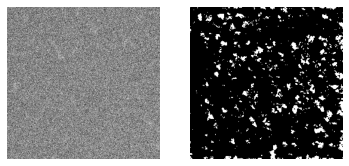

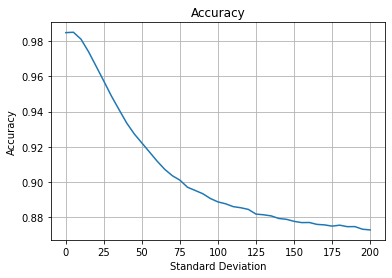

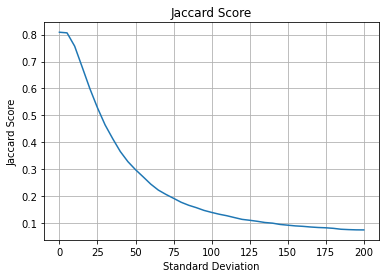

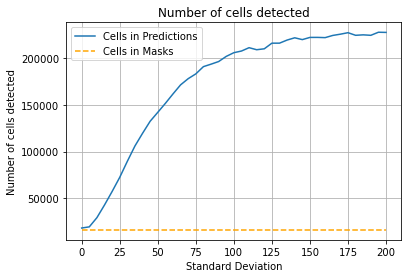

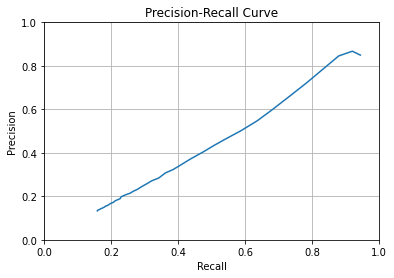

In [7]:
mean = 0
sigmas = np.linspace(0, 200, 41)
results = {}
for sigma in sigmas:
    noisy_test_images = []

    for image in test_images:
        noisy_test_images.append(add_gaussian_noise(image, mean, sigma))

    result = evaluate_model(np.array(noisy_test_images), test_masks, model, number_cells_masks)
    results[sigma] = result
    
    evaluation_summary(result, test_images[0], test_masks[0], noisy_test_images[0], model)
        
plot_all(results, "Standard Deviation")

### $\bullet$ Analysis of the perturbations caused by a rescaling of the images on the UNET performance

Accuracy                      : 0.9856291827033548
Jaccard score                 : 0.19508484353229202
Precision                     : 0.36775770851313333
Recall                        : 0.3140144439839059
Number of cells in predictions: 7248
Number of cells in masks      : 13956


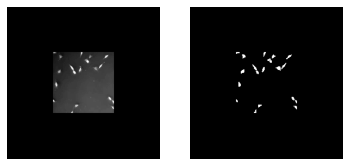

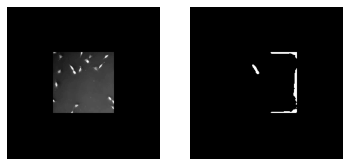

Accuracy                      : 0.9824628343769148
Jaccard score                 : 0.3300943692630043
Precision                     : 0.47694779565587375
Recall                        : 0.5198442037330986
Number of cells in predictions: 10665
Number of cells in masks      : 14709


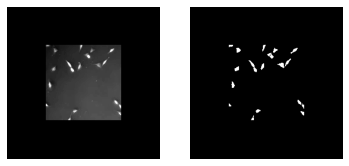

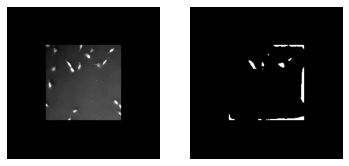

Accuracy                      : 0.9816884657915901
Jaccard score                 : 0.4968533784309708
Precision                     : 0.5845411068648568
Recall                        : 0.7666398611000764
Number of cells in predictions: 13375
Number of cells in masks      : 15203


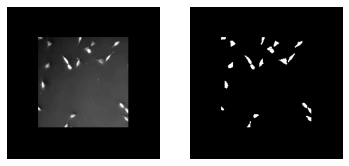

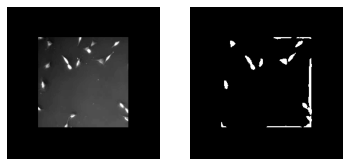

Accuracy                      : 0.9810936422909007
Jaccard score                 : 0.6000063671754206
Precision                     : 0.645878397094601
Recall                        : 0.8963390910467045
Number of cells in predictions: 14994
Number of cells in masks      : 15515


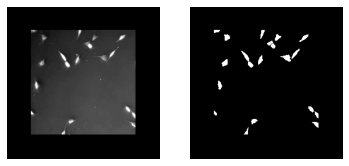

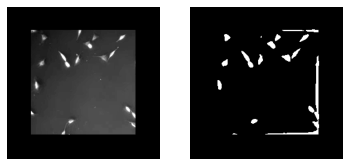

Accuracy                      : 0.9808327768363204
Jaccard score                 : 0.6641085933197393
Precision                     : 0.6972698471794823
Recall                        : 0.9343846157944743
Number of cells in predictions: 16076
Number of cells in masks      : 15719


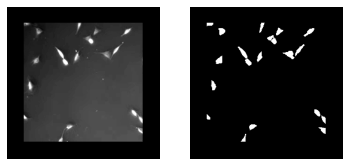

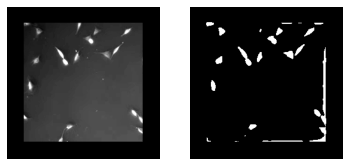

Accuracy                      : 0.9795412549785539
Jaccard score                 : 0.7007077164353822
Precision                     : 0.7328439264715949
Recall                        : 0.941711129533494
Number of cells in predictions: 17216
Number of cells in masks      : 15975


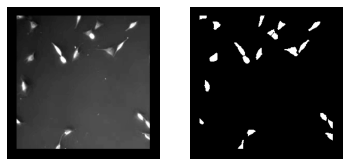

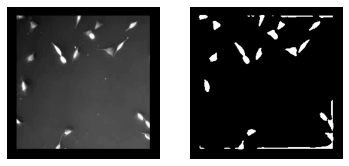

Accuracy                      : 0.9799297257965687
Jaccard score                 : 0.7419078997792309
Precision                     : 0.783236534631147
Recall                        : 0.9343309260156514
Number of cells in predictions: 17572
Number of cells in masks      : 16214


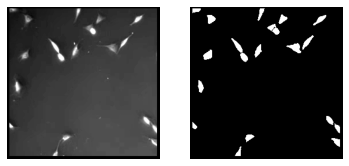

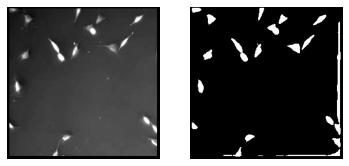

Accuracy                      : 0.9884056240904565
Jaccard score                 : 0.8461124886654711
Precision                     : 0.915047453212259
Recall                        : 0.9184552225036303
Number of cells in predictions: 15341
Number of cells in masks      : 14667


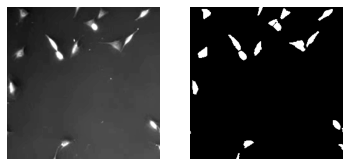

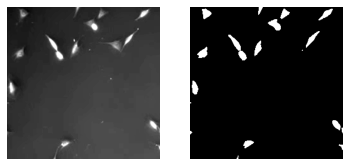

Accuracy                      : 0.9876301484949449
Jaccard score                 : 0.8297113739892026
Precision                     : 0.9269107429970341
Recall                        : 0.8880452074108981
Number of cells in predictions: 13373
Number of cells in masks      : 12753


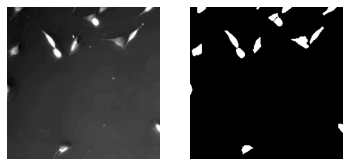

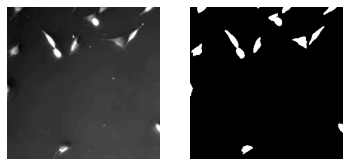

Accuracy                      : 0.9861267389035693
Jaccard score                 : 0.8031984992945519
Precision                     : 0.9332963941198115
Recall                        : 0.8522498241701856
Number of cells in predictions: 11771
Number of cells in masks      : 10939


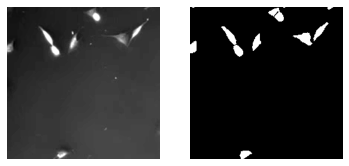

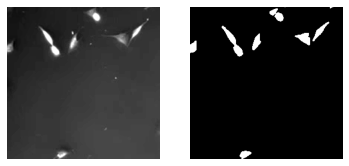

Accuracy                      : 0.9841504564472273
Jaccard score                 : 0.7735288310168248
Precision                     : 0.9357356345117178
Recall                        : 0.8173160536920884
Number of cells in predictions: 10529
Number of cells in masks      : 9556


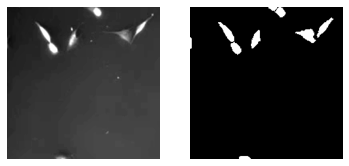

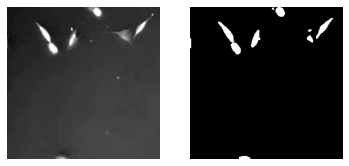

Accuracy                      : 0.9818118824678309
Jaccard score                 : 0.7360857531278414
Precision                     : 0.9367032991547511
Recall                        : 0.775303364938485
Number of cells in predictions: 9494
Number of cells in masks      : 8521


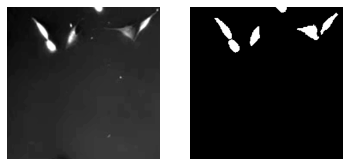

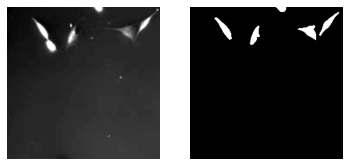

Accuracy                      : 0.9794296863032322
Jaccard score                 : 0.7005881802808853
Precision                     : 0.9358704445695835
Recall                        : 0.7369483998335213
Number of cells in predictions: 8803
Number of cells in masks      : 7646


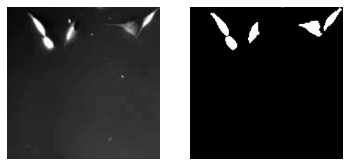

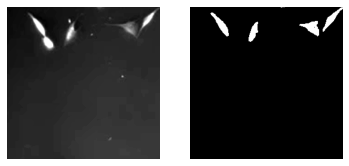

Accuracy                      : 0.9775600657743566
Jaccard score                 : 0.6719042688513228
Precision                     : 0.933313002329216
Recall                        : 0.7067514029243049
Number of cells in predictions: 8153
Number of cells in masks      : 6898


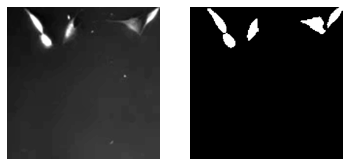

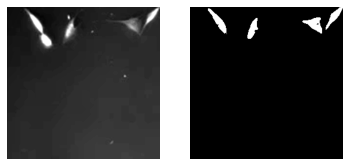

Accuracy                      : 0.9759699204388786
Jaccard score                 : 0.6471085830486785
Precision                     : 0.9297543750324452
Recall                        : 0.6814985253744783
Number of cells in predictions: 7576
Number of cells in masks      : 6327


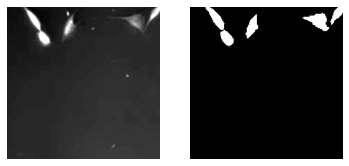

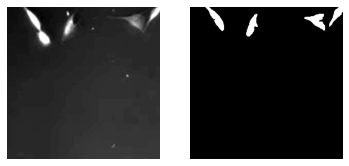

Accuracy                      : 0.9751252716662837
Jaccard score                 : 0.6392603946707516
Precision                     : 0.9270090269699603
Recall                        : 0.674756428704225
Number of cells in predictions: 7079
Number of cells in masks      : 5803


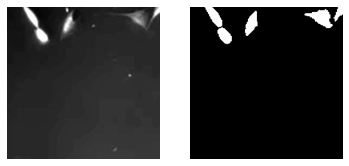

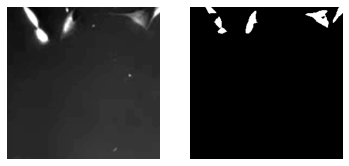

Accuracy                      : 0.9745976466758578
Jaccard score                 : 0.6324690700774275
Precision                     : 0.9241243347745336
Recall                        : 0.6688206372129759
Number of cells in predictions: 6708
Number of cells in masks      : 5297


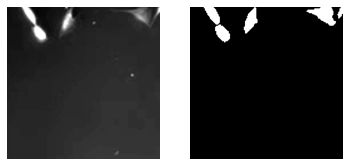

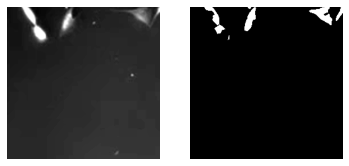

Accuracy                      : 0.9740298402075674
Jaccard score                 : 0.632994790275746
Precision                     : 0.9213014340111878
Recall                        : 0.670846405159819
Number of cells in predictions: 6255
Number of cells in masks      : 4826


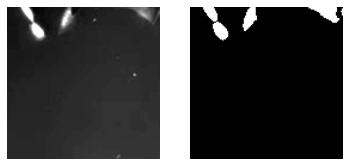

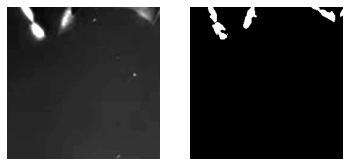

Accuracy                      : 0.9725780412262561
Jaccard score                 : 0.6081623757820462
Precision                     : 0.8926334501018824
Recall                        : 0.6515919118211952
Number of cells in predictions: 4561
Number of cells in masks      : 3839


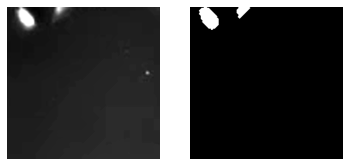

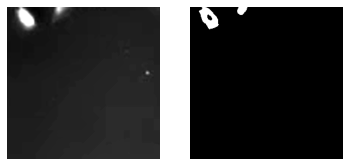

Accuracy                      : 0.9693540984509038
Jaccard score                 : 0.5503031033734765
Precision                     : 0.8635057665354263
Recall                        : 0.5873272684255098
Number of cells in predictions: 3577
Number of cells in masks      : 2740


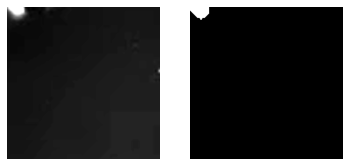

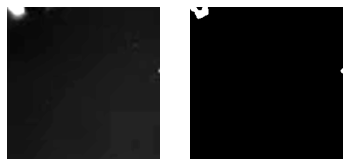

Accuracy                      : 0.9655395208620557
Jaccard score                 : 0.4718360916655175
Precision                     : 0.821035082686045
Recall                        : 0.5015388327195734
Number of cells in predictions: 2914
Number of cells in masks      : 2301


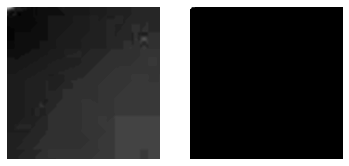

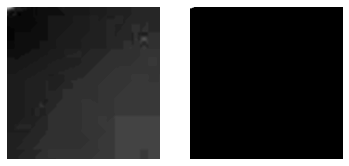

Accuracy                      : 0.9612935982498468
Jaccard score                 : 0.39908591541387317
Precision                     : 0.7795002759122045
Recall                        : 0.4189798063976132
Number of cells in predictions: 2479
Number of cells in masks      : 1927


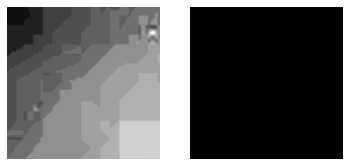

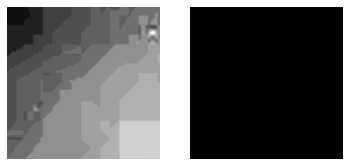

Accuracy                      : 0.9572188732670802
Jaccard score                 : 0.335177726358036
Precision                     : 0.7284053537878463
Recall                        : 0.34976066421594887
Number of cells in predictions: 2122
Number of cells in masks      : 1722


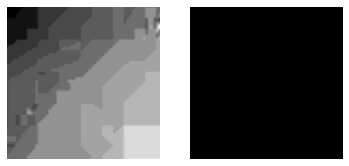

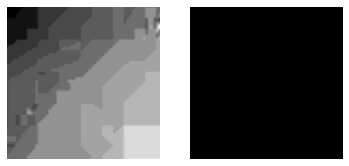

Accuracy                      : 0.9525766410079657
Jaccard score                 : 0.2741472382149054
Precision                     : 0.6763687033400774
Recall                        : 0.28379207932457207
Number of cells in predictions: 1920
Number of cells in masks      : 1545


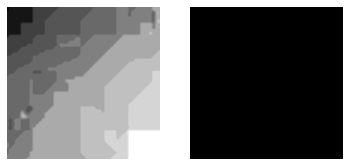

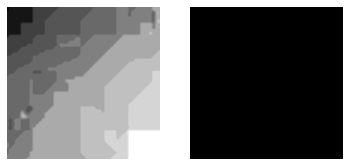

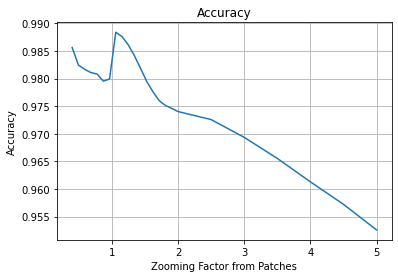

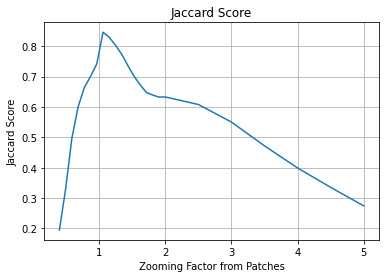

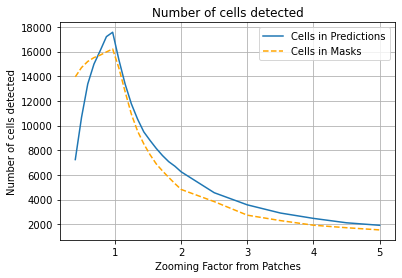

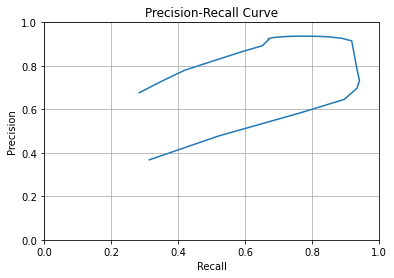

In [8]:
zooms = np.r_[np.linspace(0.4, 2, 17, endpoint=False), np.linspace(2, 5, 7)]
results = {}
for zoom in zooms:
    zoomed_test_images = []
    zoomed_test_masks = []
    
    for image, mask in zip(test_images, test_masks):
        zoomed_test_images.append(zoom_image(image, zoom))
        zoomed_test_masks.append(zoom_image(mask, zoom, val_padding=0))

    result = evaluate_model(np.array(zoomed_test_images), np.array(zoomed_test_masks), model)
    results[zoom] = result
    
    evaluation_summary(result, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_all(results, "Zooming Factor from Patches")

### $\bullet$ Get full input images from dataset

In [9]:
test_full_images, test_full_masks = get_dataset_from_folders(test_input_path, test_output_path)
full_images_shape = (*test_full_images[0].shape, 1)

print(f'Test set contains {len(test_full_images)} images of shape {full_images_shape}.')

Test set contains 85 images of shape (576, 720, 1).


### $\bullet$ Analysis of the perturbations caused by havind different sizes of cells on the UNET performance

Accuracy                      : 0.9528324501187193
Jaccard score                 : 0.4430980109054825
Precision                     : 0.698213712164527
Recall                        : 0.5491854517603054
Number of cells in predictions: 41417
Number of cells in masks      : 55955


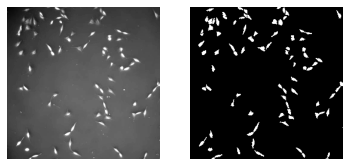

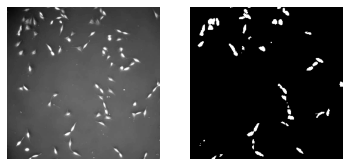

Accuracy                      : 0.9695521934359681
Jaccard score                 : 0.6529175571036635
Precision                     : 0.779161846104636
Recall                        : 0.8016532466052857
Number of cells in predictions: 36813
Number of cells in masks      : 41719


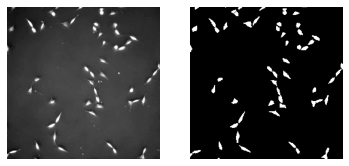

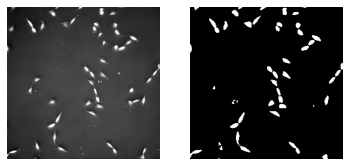

Accuracy                      : 0.9797497917624081
Jaccard score                 : 0.7612984722802373
Precision                     : 0.8161503501179369
Recall                        : 0.9189250578506819
Number of cells in predictions: 30317
Number of cells in masks      : 32007


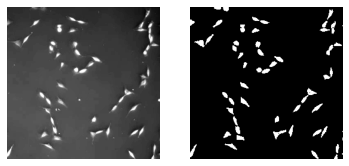

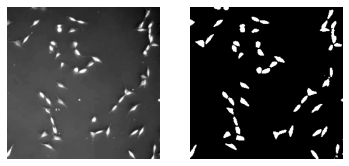

Accuracy                      : 0.9845820109049479
Jaccard score                 : 0.8124893147816626
Precision                     : 0.8509698724210304
Recall                        : 0.9475378728898123
Number of cells in predictions: 24911
Number of cells in masks      : 25398


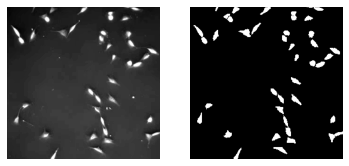

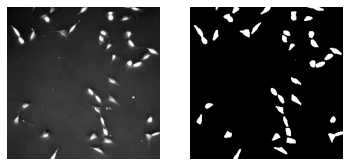

Accuracy                      : 0.9872874241249234
Jaccard score                 : 0.8387343707877357
Precision                     : 0.8786670782364298
Recall                        : 0.9488065669333292
Number of cells in predictions: 20735
Number of cells in masks      : 20720


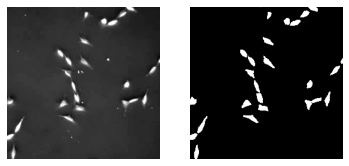

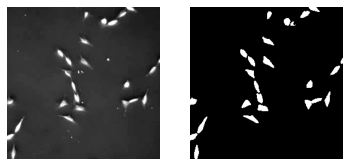

Accuracy                      : 0.9883597878848805
Jaccard score                 : 0.8475509759644346
Precision                     : 0.8993543121029643
Recall                        : 0.9366016844840266
Number of cells in predictions: 17561
Number of cells in masks      : 17044


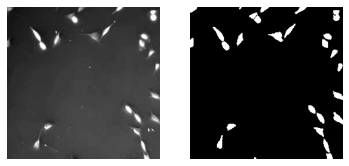

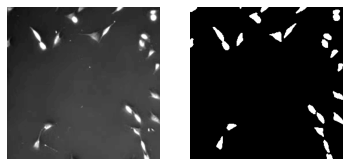

Accuracy                      : 0.9881745923467044
Jaccard score                 : 0.8419066141239537
Precision                     : 0.9120018742958625
Recall                        : 0.9165001059599845
Number of cells in predictions: 17666
Number of cells in masks      : 16649


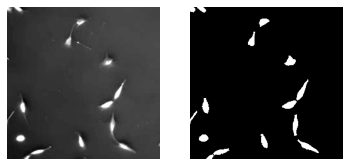

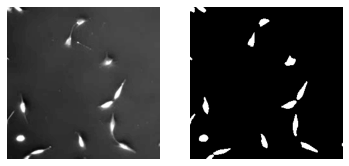

Accuracy                      : 0.9870854321648093
Jaccard score                 : 0.8256028989950192
Precision                     : 0.9199252448921497
Recall                        : 0.8897620776835273
Number of cells in predictions: 17909
Number of cells in masks      : 16529


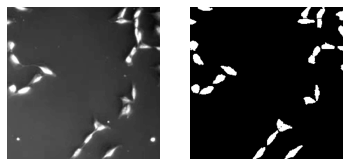

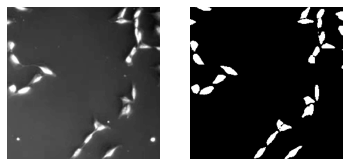

Accuracy                      : 0.9849127077588848
Jaccard score                 : 0.7933003535462885
Precision                     : 0.9229629387683105
Recall                        : 0.8501458068041635
Number of cells in predictions: 18057
Number of cells in masks      : 16315


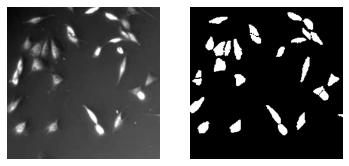

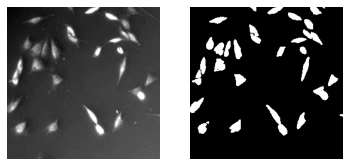

Accuracy                      : 0.9827427991571274
Jaccard score                 : 0.7627713847231511
Precision                     : 0.9282808964126014
Recall                        : 0.8113055894416701
Number of cells in predictions: 20194
Number of cells in masks      : 17881


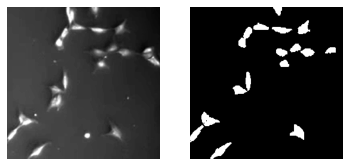

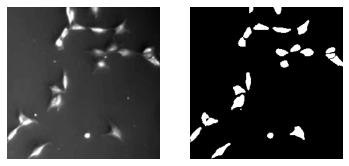

Accuracy                      : 0.9802943855389211
Jaccard score                 : 0.727078079233187
Precision                     : 0.926460085240472
Recall                        : 0.7729993932974556
Number of cells in predictions: 21832
Number of cells in masks      : 18923


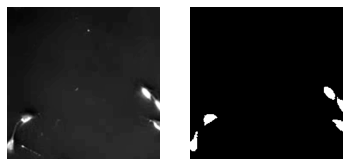

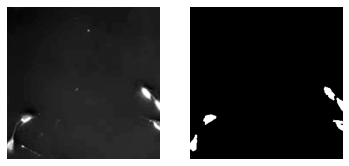

Accuracy                      : 0.9783549973944656
Jaccard score                 : 0.6959285273982365
Precision                     : 0.9256129292157472
Recall                        : 0.7379599245542673
Number of cells in predictions: 21190
Number of cells in masks      : 18039


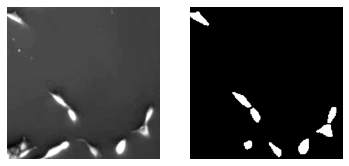

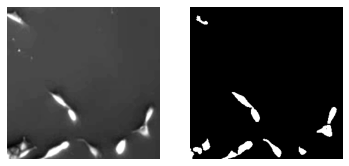

Accuracy                      : 0.9754542631261489
Jaccard score                 : 0.6662761018077075
Precision                     : 0.9257240238424684
Recall                        : 0.7056000313745996
Number of cells in predictions: 23130
Number of cells in masks      : 19345


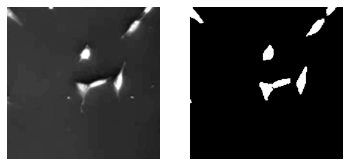

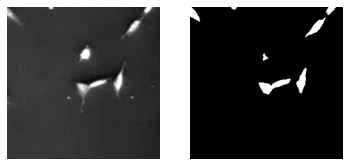

Accuracy                      : 0.9738257414375255
Jaccard score                 : 0.6447810698336954
Precision                     : 0.9132449856306816
Recall                        : 0.6880516580899895
Number of cells in predictions: 24565
Number of cells in masks      : 19912


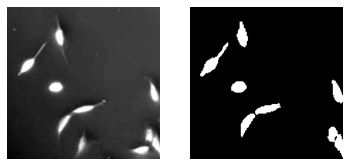

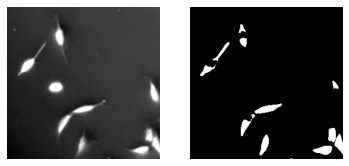

Accuracy                      : 0.9732499246036305
Jaccard score                 : 0.6352420639851973
Precision                     : 0.9173200057885788
Recall                        : 0.6749103393961875
Number of cells in predictions: 25160
Number of cells in masks      : 20098


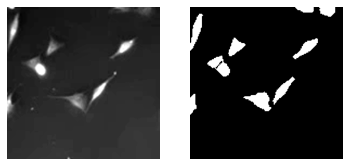

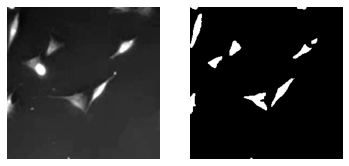

Accuracy                      : 0.9723381881518742
Jaccard score                 : 0.6274280713566769
Precision                     : 0.9120174794702658
Recall                        : 0.6687191187926004
Number of cells in predictions: 27346
Number of cells in masks      : 21614


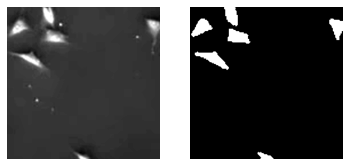

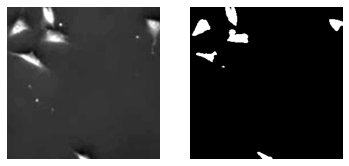

Accuracy                      : 0.9709345344094669
Jaccard score                 : 0.6162149468907123
Precision                     : 0.9080992154343651
Recall                        : 0.6591966063769372
Number of cells in predictions: 28545
Number of cells in masks      : 21629


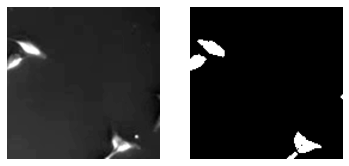

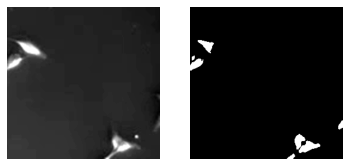

Accuracy                      : 0.9679006723257212
Jaccard score                 : 0.5773107348644247
Precision                     : 0.8839156278204694
Recall                        : 0.620098004574043
Number of cells in predictions: 32515
Number of cells in masks      : 25020


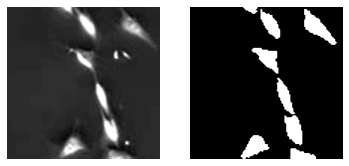

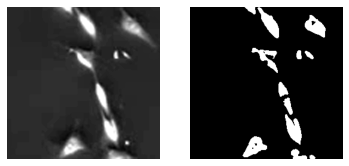

Accuracy                      : 0.9637341195215751
Jaccard score                 : 0.5099101193675858
Precision                     : 0.8413665811429395
Recall                        : 0.5498972226603449
Number of cells in predictions: 37844
Number of cells in masks      : 28185


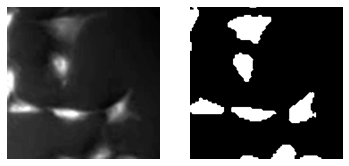

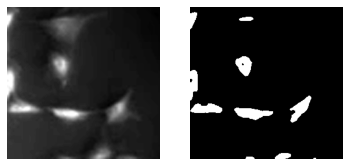

Accuracy                      : 0.9595369133537648
Jaccard score                 : 0.4309662139335177
Precision                     : 0.7968420487542403
Recall                        : 0.4601946022031928
Number of cells in predictions: 40457
Number of cells in masks      : 30909


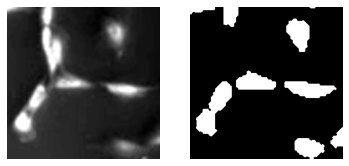

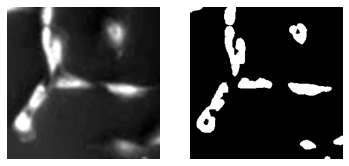

Accuracy                      : 0.9559483023250804
Jaccard score                 : 0.356643127750676
Precision                     : 0.745289875007852
Recall                        : 0.3778697167875064
Number of cells in predictions: 34837
Number of cells in masks      : 27187


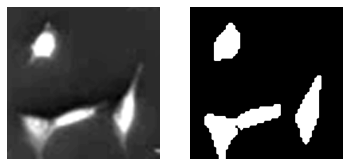

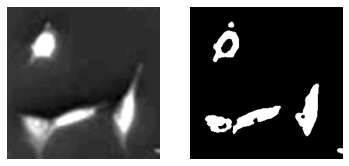

Accuracy                      : 0.9517994555305033
Jaccard score                 : 0.279620850973211
Precision                     : 0.6819346461482595
Recall                        : 0.29338770995825164
Number of cells in predictions: 28602
Number of cells in masks      : 23167


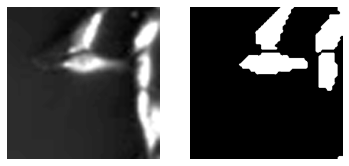

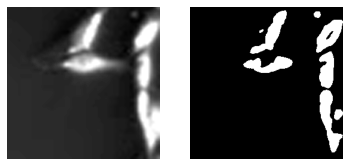

Accuracy                      : 0.9480932258157169
Jaccard score                 : 0.2294373119187972
Precision                     : 0.6397873890049692
Recall                        : 0.2395885014405976
Number of cells in predictions: 25105
Number of cells in masks      : 20996


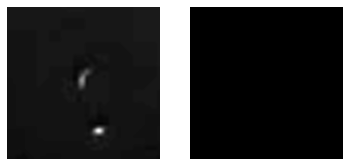

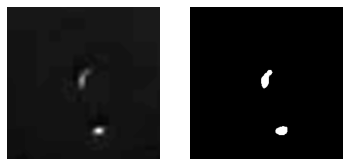

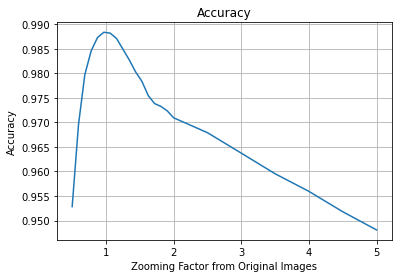

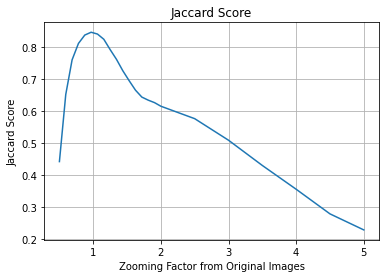

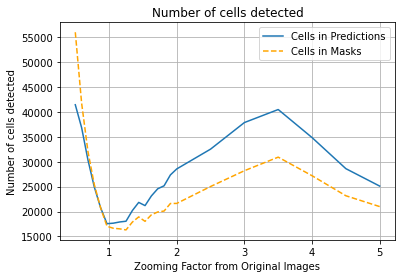

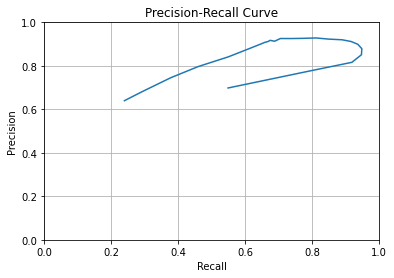

In [10]:
zooms = np.r_[np.linspace(0.5, 2, 16, endpoint=False), np.linspace(2, 5, 7)]
results = {}
for zoom in zooms:
    zoomed_test_images = []
    zoomed_test_masks = []
    
    patch_shape = (int(images_shape[0] / zoom), int(images_shape[1] / zoom), 1)
    n_patches = np.clip(np.prod(np.divide(full_images_shape, patch_shape)), 6, 80).astype('uint')
    patch_image, patch_masks = split_images_and_masks_into_patches(test_full_images, test_full_masks, patch_shape, n_patches)
    
    for image, mask in zip(patch_image, patch_masks):
        zoomed_test_images.append(zoom_image_to_meet_shape(image, images_shape))
        zoomed_test_masks.append(zoom_image_to_meet_shape(mask, images_shape))

    result = evaluate_model(np.array(zoomed_test_images), np.array(zoomed_test_masks), model)
    results[zoom] = result
    
    evaluation_summary(result, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_all(results, "Zooming Factor from Original Images")